In [1]:
import numpy as np
import pandas as pd

# Loading and preparing the dataset

In [2]:
raw_df = pd.read_csv(r"D:\Wrk\Datasets\Jupyter\Z_15.csv")

raw_df.drop(columns = ["metaObjID", "objID", "Unnamed: 0"], inplace = True)
#print(raw_df)
 
coord = pd.Series([np.array( raw_df.loc[ID, list("xyz")].tolist() ) for ID in raw_df.index], name = "COORD", index = raw_df.index)
#print(coord)

ini_df = pd.concat([raw_df, coord], axis = 1)

print(ini_df.iloc[:5])


           x          y          z   tp  track  target  \
0   0.000000  20.000000   0.000000  0.0    0.0    25.0   
1  -5.893828  18.333333   5.399229  0.0    1.0    26.0   
2   0.966528  16.666667 -11.013085  0.0    2.0    27.0   
3   8.048890  15.000000  10.498351  0.0    3.0    28.0   
4 -14.679242  13.333333  -2.596551  0.0    4.0    29.0   

                                               COORD  
0                                   [0.0, 20.0, 0.0]  
1  [-5.893828182996233, 18.33333333333333, 5.3992...  
2  [0.9665277530368532, 16.666666666666668, -11.0...  
3       [8.04888957068736, 15.0, 10.498351140959244]  
4  [-14.679241943506929, 13.333333333333336, -2.5...  


# Computing displacement vectors

In [3]:
displ = pd.Series(index = ini_df.index, dtype = "object", name = "DISP_VECT")

for ID in ini_df.index:
    target_ID = ini_df.loc[ID, "target"]
    
    if not np.isnan(target_ID): 
        displ.loc[ID] = ini_df.loc[ID, "COORD"] - ini_df.loc[int(target_ID), "COORD"]
        
    else : 
        displ.loc[ID] = np.nan

#print(displ)

ini_df = pd.concat([ini_df, displ], axis = 1)
print(ini_df.iloc[:5])


           x          y          z   tp  track  target  \
0   0.000000  20.000000   0.000000  0.0    0.0    25.0   
1  -5.893828  18.333333   5.399229  0.0    1.0    26.0   
2   0.966528  16.666667 -11.013085  0.0    2.0    27.0   
3   8.048890  15.000000  10.498351  0.0    3.0    28.0   
4 -14.679242  13.333333  -2.596551  0.0    4.0    29.0   

                                               COORD  \
0                                   [0.0, 20.0, 0.0]   
1  [-5.893828182996233, 18.33333333333333, 5.3992...   
2  [0.9665277530368532, 16.666666666666668, -11.0...   
3       [8.04888957068736, 15.0, 10.498351140959244]   
4  [-14.679241943506929, 13.333333333333336, -2.5...   

                                       DISP_VECT  
0   [5.176380902050415, 0.6814834742186306, 0.0]  
1  [4.5441885015497485, 2.1501281670218226, 0.0]  
2   [4.346584386262093, 0.3177471050761085, 0.0]  
3  [4.156544937949519, -1.5720933071569654, 0.0]  
4   [2.9507375614390927, 4.253589698793087, 0.0]  


## Sanity check : showing displacements vectors

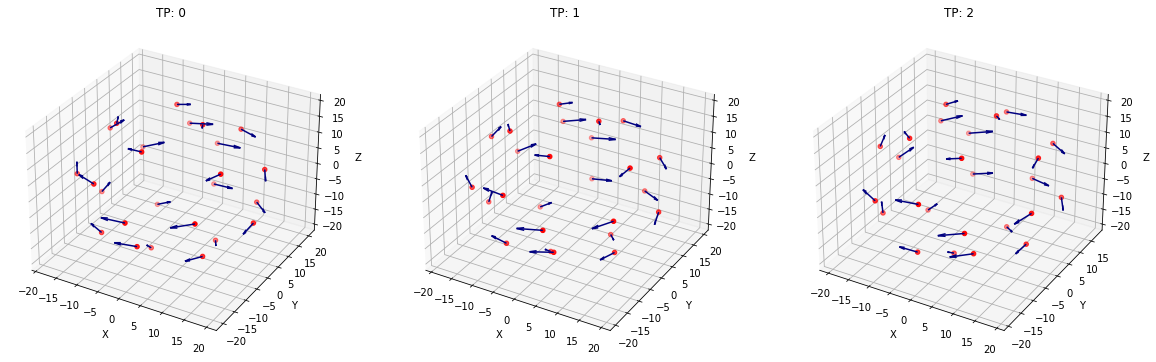

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure( figsize=(20,7) )

ax1 = fig.add_subplot( 1, 3, 1, projection='3d' ); ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z');
ax2 = fig.add_subplot( 1, 3, 2, projection='3d' ); ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z'); 
ax3 = fig.add_subplot( 1, 3, 3, projection='3d' ); ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z');

axs = [ax1, ax2, ax3]

for tp in range(3):
    coord_arr = np.array(ini_df[ini_df["tp"] == tp]["COORD"].tolist())
    displ_arr = np.array(ini_df[ini_df["tp"] == tp]["DISP_VECT"].tolist())
    
    #print(coord_arr)
    #print(displ_arr)
    
    axs[tp].quiver(coord_arr[:, 0], coord_arr[:, 1], coord_arr[:, 2], 
                   displ_arr[:, 0], displ_arr[:, 1], displ_arr[:, 2],
                   color = "navy")
    axs[tp].scatter(coord_arr[:, 0], coord_arr[:, 1], coord_arr[:, 2],
                    color = "red")
    
    axs[tp].set_title("TP: "+str(tp))
    
plt.show()
    
    

# Computing PCA plane to get directory vector of the rotation axis

In [5]:
from sklearn.decomposition import PCA

tp_df = pd.DataFrame(index = ini_df["tp"].unique(), columns = ["V1", "V2", "RA"], dtype = "object")

for tp in tp_df.index:
    subdf = ini_df[ini_df["tp"] == tp]["DISP_VECT"]
    
    if not subdf.dropna().empty :
        arr = np.array( subdf.tolist() )
        #print(arr)

        pca = PCA(n_components = 2)
        pca.fit(arr)

        V1 = pca.components_[0]
        V2 = pca.components_[1]
        RA = np.cross(V1, V2)
    
    else :
        V1, V2, RA = np.nan, np.nan, np.nan
    
    tp_df.loc[tp] = [V1, V2, RA]
    
print(tp_df.iloc[:5])
    
    

                                                   V1  \
0.0  [-0.9717275512132825, -0.2361049898096977, -0.0]   
1.0  [-0.8775082698270543, -0.4795615042777409, -0.0]   
2.0  [-0.7234882500030965, -0.6903366947421069, -0.0]   
3.0  [-0.5201637015622886, -0.8540665802951303, -0.0]   
4.0  [-0.2813908564711738, -0.9595932398127967, -0.0]   

                                                  V2  \
0.0  [0.2361049898096977, -0.9717275512132825, -0.0]   
1.0  [0.4795615042777409, -0.8775082698270543, -0.0]   
2.0  [0.6903366947421069, -0.7234882500030965, -0.0]   
3.0  [0.8540665802951303, -0.5201637015622886, -0.0]   
4.0  [0.9595932398127967, -0.2813908564711738, -0.0]   

                                  RA  
0.0                 [0.0, -0.0, 1.0]  
1.0                 [0.0, -0.0, 1.0]  
2.0                 [0.0, -0.0, 1.0]  
3.0  [0.0, -0.0, 0.9999999999999999]  
4.0  [0.0, -0.0, 1.0000000000000002]  


## Rounding values

In [6]:
for col in tp_df.columns:
    for ID in tp_df.index:
        tp_df.loc[ID, col] = np.round(tp_df.loc[ID, col], 3)
        
print(tp_df.iloc[:5])

                         V1                     V2                RA
0.0  [-0.972, -0.236, -0.0]  [0.236, -0.972, -0.0]  [0.0, -0.0, 1.0]
1.0   [-0.878, -0.48, -0.0]   [0.48, -0.878, -0.0]  [0.0, -0.0, 1.0]
2.0   [-0.723, -0.69, -0.0]   [0.69, -0.723, -0.0]  [0.0, -0.0, 1.0]
3.0   [-0.52, -0.854, -0.0]   [0.854, -0.52, -0.0]  [0.0, -0.0, 1.0]
4.0   [-0.281, -0.96, -0.0]   [0.96, -0.281, -0.0]  [0.0, -0.0, 1.0]


## Sanity check : showing PCA plane vectors and rotation axis

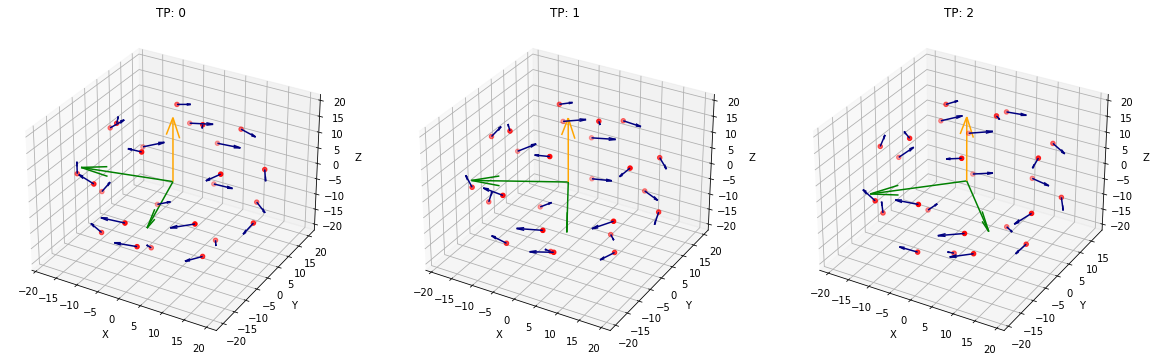

In [7]:
fig = plt.figure( figsize=(20,7) )

ax1 = fig.add_subplot( 1, 3, 1, projection='3d' ); ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z');
ax2 = fig.add_subplot( 1, 3, 2, projection='3d' ); ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z'); 
ax3 = fig.add_subplot( 1, 3, 3, projection='3d' ); ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z');

axs = [ax1, ax2, ax3]

for tp in range(3):
    coord_arr = np.array(ini_df[ini_df["tp"] == tp]["COORD"].tolist())
    displ_arr = np.array(ini_df[ini_df["tp"] == tp]["DISP_VECT"].tolist())
    
    #print(coord_arr)
    #print(displ_arr)
    
    axs[tp].quiver(coord_arr[:, 0], coord_arr[:, 1], coord_arr[:, 2], 
                   displ_arr[:, 0], displ_arr[:, 1], displ_arr[:, 2],
                   color = "navy")
    axs[tp].scatter(coord_arr[:, 0], coord_arr[:, 1], coord_arr[:, 2],
                    color = "red")
    
    axs[tp].set_title("TP: "+str(tp))

for tp in range(3):
    ## Here, the dataset is already centered in [0, 0, 0].
    centroid = [0, 0, 0]
    
    vectors = np.array(tp_df.loc[tp].tolist())
    #print(vectors)
    
    ## Vectors defining the plane are green, rotation axis is orange.
    colors = ["green", "green", "orange"]
    
    
    for v_ID in range(3):
        axs[tp].quiver(centroid[0], centroid[1], centroid[2],
                       vectors[v_ID, 0], vectors[v_ID, 1], vectors[v_ID, 2],
                       color = colors[v_ID], length = 20)
        
plt.show()

# Computing angular velocity

In [8]:
av_res = pd.DataFrame(index = ini_df.index, columns = ["R_vect", "R", "AV_VECT", "AV", "AV_deg"], dtype = "object")

for ID in ini_df.index:
    V1, V2 = tp_df.loc[ ini_df.loc[ID, "tp"], ["V1", "V2"]]
    coord, displ = ini_df.loc[ID, ["COORD", "DISP_VECT"]]
    #print(displ)
    
    if not np.isnan(displ).any() and not np.equal(displ, np.zeros(3)).all():
        r_vect = np.dot(coord, V1)*V1 + np.dot(coord, V2)*V2
        r = np.linalg.norm(r_vect)
        #print(r_vect, r)

        AV_vect = np.cross(r_vect, displ)/(r**2)
        AV = np.linalg.norm(AV_vect)
    
        av_res.loc[ID] = pd.Series([np.round(r_vect, 3), round(r, 3), np.round(AV_vect, 3), round(AV, 3), round(AV*180/np.pi, 3)], 
                                   name = ID, index = av_res.columns, dtype = "object")
    
#print(av_res)

final_df = pd.concat([ini_df, av_res], axis = 1)
print(final_df.iloc[:5])

           x          y          z   tp  track  target  \
0   0.000000  20.000000   0.000000  0.0    0.0    25.0   
1  -5.893828  18.333333   5.399229  0.0    1.0    26.0   
2   0.966528  16.666667 -11.013085  0.0    2.0    27.0   
3   8.048890  15.000000  10.498351  0.0    3.0    28.0   
4 -14.679242  13.333333  -2.596551  0.0    4.0    29.0   

                                               COORD  \
0                                   [0.0, 20.0, 0.0]   
1  [-5.893828182996233, 18.33333333333333, 5.3992...   
2  [0.9665277530368532, 16.666666666666668, -11.0...   
3       [8.04888957068736, 15.0, 10.498351140959244]   
4  [-14.679241943506929, 13.333333333333336, -2.5...   

                                       DISP_VECT                 R_vect  \
0   [5.176380902050415, 0.6814834742186306, 0.0]      [0.0, 20.01, 0.0]   
1  [4.5441885015497485, 2.1501281670218226, 0.0]  [-5.897, 18.342, 0.0]   
2   [4.346584386262093, 0.3177471050761085, 0.0]   [0.967, 16.675, 0.0]   
3  [4.15654493

## Sanity check : plotting mean angular velocity over time.

<AxesSubplot:xlabel='tp', ylabel='AV'>

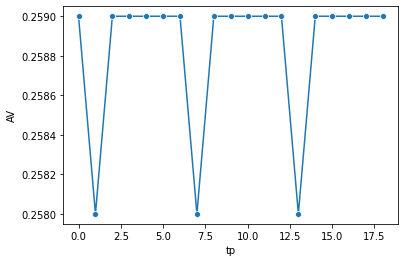

In [9]:
import seaborn as sns

sns.lineplot(data = final_df, x = "tp", y = "AV", ci='sd', err_style='bars', marker = "o")